In [1]:
import vasptools
import matplotlib.pyplot as plt

In [2]:
vrun = vasptools.vasprun.vasprun_parser('./vasptools/test/vasprun_pdos.xml')

In [3]:
vrun.keys()

dict_keys(['cell', 'symbols', 'vasp_pot', 'dos_total_header', 'dos_partial_header', 'calc_arrays', 'positions'])

In [4]:
pdos = vrun['calc_arrays/dos/partial']

In [5]:
pdos

{'spin1': {'dxy': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  'dxz': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  'dyz': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  'dz2': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0.,

In [6]:
dxy = pdos['spin1']['dxy']

In [7]:
vrun['dos_partial_header']

['energy', 's', 'py', 'pz', 'px', 'dxy', 'dyz', 'dz2', 'dxz', 'x2-y2']

In [8]:
energy = pdos['spin1']['energy']

In [9]:
energy

array([[-25.6386, -25.5425, -25.4463, ...,   3.0116,   3.1077,   3.2038],
       [-25.6386, -25.5425, -25.4463, ...,   3.0116,   3.1077,   3.2038],
       [-25.6386, -25.5425, -25.4463, ...,   3.0116,   3.1077,   3.2038],
       ...,
       [-25.6386, -25.5425, -25.4463, ...,   3.0116,   3.1077,   3.2038],
       [-25.6386, -25.5425, -25.4463, ...,   3.0116,   3.1077,   3.2038],
       [-25.6386, -25.5425, -25.4463, ...,   3.0116,   3.1077,   3.2038]])

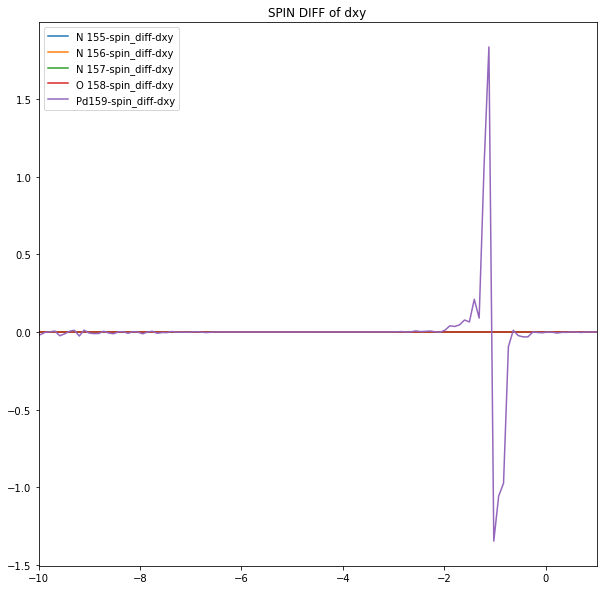

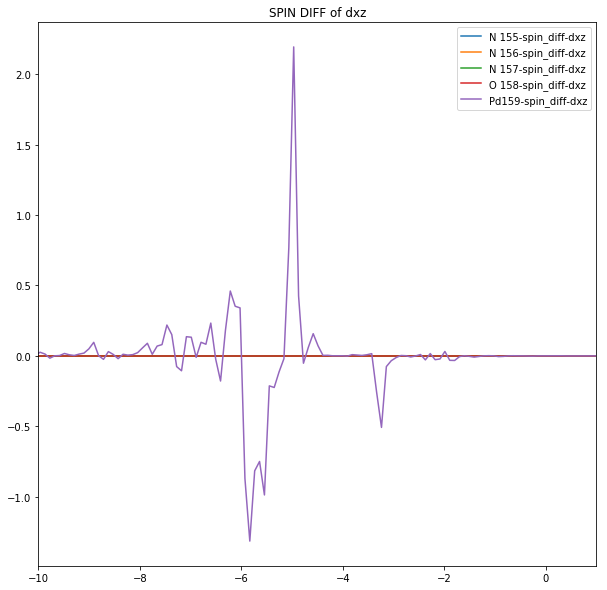

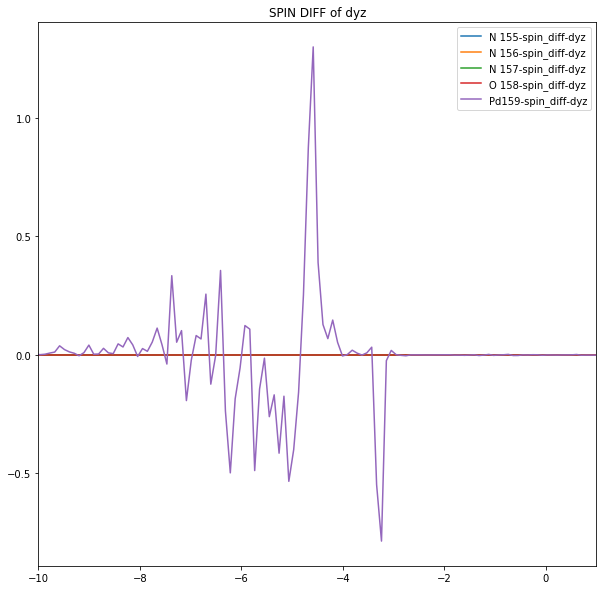

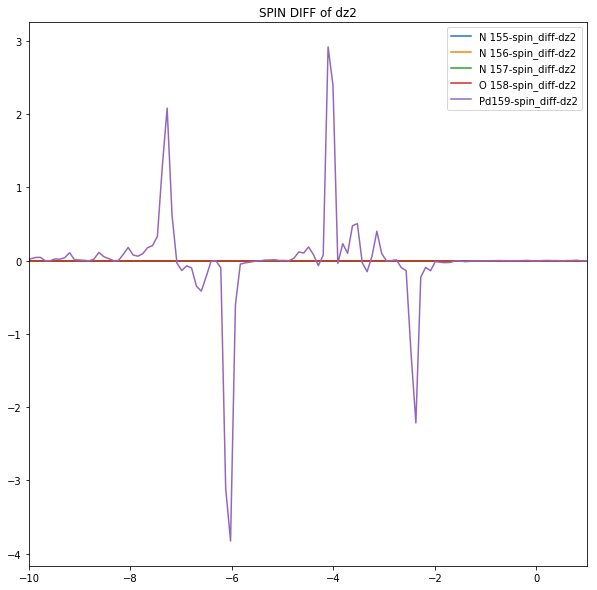

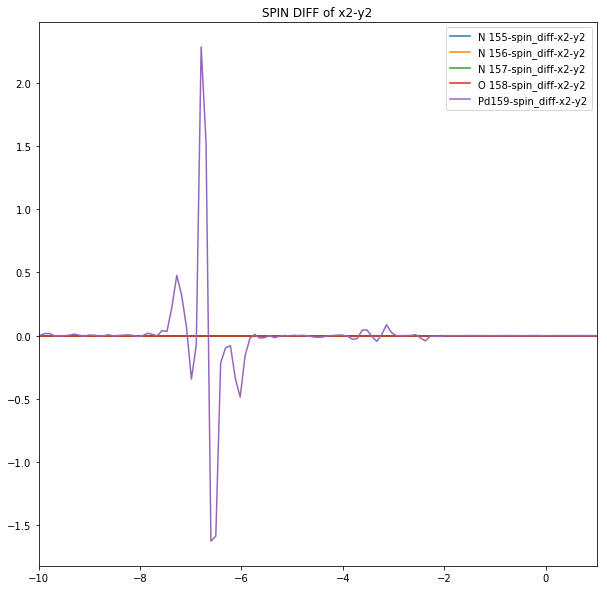

In [10]:
atom_show = range(-5, 0)
symbols = vrun['symbols']
angmomentum_types = ['dxy', 'dxz', 'dyz', 'dz2', 'x2-y2']
# angmomentum = 'dz2'
legend = []
spin_types = ['spin1', 'spin2', 'spin_diff']
spin_types = ['spin_diff']
for angmomentum in angmomentum_types:
    plt.figure(figsize=(10, 10))
    for atomi in atom_show:
        for spin in spin_types:
            direction = 1
            if spin == 'spin2':
                direction = -1
            label = '{0}{3}-{1}-{2}'.format(symbols[atomi], spin, angmomentum, atomi % len(symbols))
            x = energy[0]
            if spin in ['spin1', 'spin2']:
                y = direction * vrun['/calc_arrays/dos/partial/{0}/{1}'.format(spin, angmomentum)][atomi]
            elif spin == 'spin_diff':
                y = vrun['/calc_arrays/dos/partial/{0}/{1}'.format('spin1', angmomentum)][atomi] - vrun['/calc_arrays/dos/partial/{0}/{1}'.format('spin2', angmomentum)][atomi]
            plt.plot(x, y, label=label)
    plt.legend()
    plt.xlim([-10, 1])
    plt.title('SPIN DIFF of {0}'.format(angmomentum))
#     plt.ylim([-3, 3])

In [11]:
vasptools?

In [12]:
vrun['calc_arrays/dos/partial']

{'spin1': {'dxy': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  'dxz': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  'dyz': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  'dz2': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0.,

In [13]:
vrun['calc_arrays/dos/total']

{'spin1': {'energy': array([-25.6386, -25.5425, -25.4463, -25.3502, -25.254 , -25.1579,
         -25.0618, -24.9656, -24.8695, -24.7733, -24.6772, -24.581 ,
         -24.4849, -24.3888, -24.2926, -24.1965, -24.1003, -24.0042,
         -23.9081, -23.8119, -23.7158, -23.6196, -23.5235, -23.4273,
         -23.3312, -23.2351, -23.1389, -23.0428, -22.9466, -22.8505,
         -22.7544, -22.6582, -22.5621, -22.4659, -22.3698, -22.2737,
         -22.1775, -22.0814, -21.9852, -21.8891, -21.7929, -21.6968,
         -21.6007, -21.5045, -21.4084, -21.3122, -21.2161, -21.12  ,
         -21.0238, -20.9277, -20.8315, -20.7354, -20.6392, -20.5431,
         -20.447 , -20.3508, -20.2547, -20.1585, -20.0624, -19.9663,
         -19.8701, -19.774 , -19.6778, -19.5817, -19.4855, -19.3894,
         -19.2933, -19.1971, -19.101 , -19.0048, -18.9087, -18.8126,
         -18.7164, -18.6203, -18.5241, -18.428 , -18.3318, -18.2357,
         -18.1396, -18.0434, -17.9473, -17.8511, -17.755 , -17.6589,
         -17.56

In [16]:
from ase.build import molecule

In [23]:
mol = molecule('C6H6')

In [24]:
mol.get_chemical_symbols()

['C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H']

In [26]:
mol.positions[:6]

array([[ 0.      ,  1.395248,  0.      ],
       [ 1.20832 ,  0.697624,  0.      ],
       [ 1.20832 , -0.697624,  0.      ],
       [ 0.      , -1.395248,  0.      ],
       [-1.20832 , -0.697624,  0.      ],
       [-1.20832 ,  0.697624,  0.      ]])